'../output/submission_250729(2)_RESNET.csv' 파일 로드 성공!
총 3229개의 예측(객체)을 발견했습니다.

### 1. 종합 통계 ###
- 예측이 포함된 이미지 수: 843개

--- 신뢰도 점수(Score) 통계 ---
count    3229.000000
mean        0.939834
std         0.083323
min         0.504489
25%         0.951808
50%         0.968320
75%         0.975474
max         0.991664
Name: score, dtype: float64

--- Bbox 크기(너비/높이) 통계 ---
            bbox_w       bbox_h      bbox_area
count  3229.000000  3229.000000    3229.000000
mean    259.567036   290.470084   79351.275037
std      69.529297   119.184838   47590.910250
min     125.338550   118.305850   17858.489969
25%     209.207030   199.287410   43468.086601
50%     241.081500   231.581830   57452.057421
75%     292.911220   410.345900  107021.151468
max     514.868400   662.256350  278188.199256

### 2. 시각적 분석 ###


/tmp/ipykernel_523487/1055900521.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


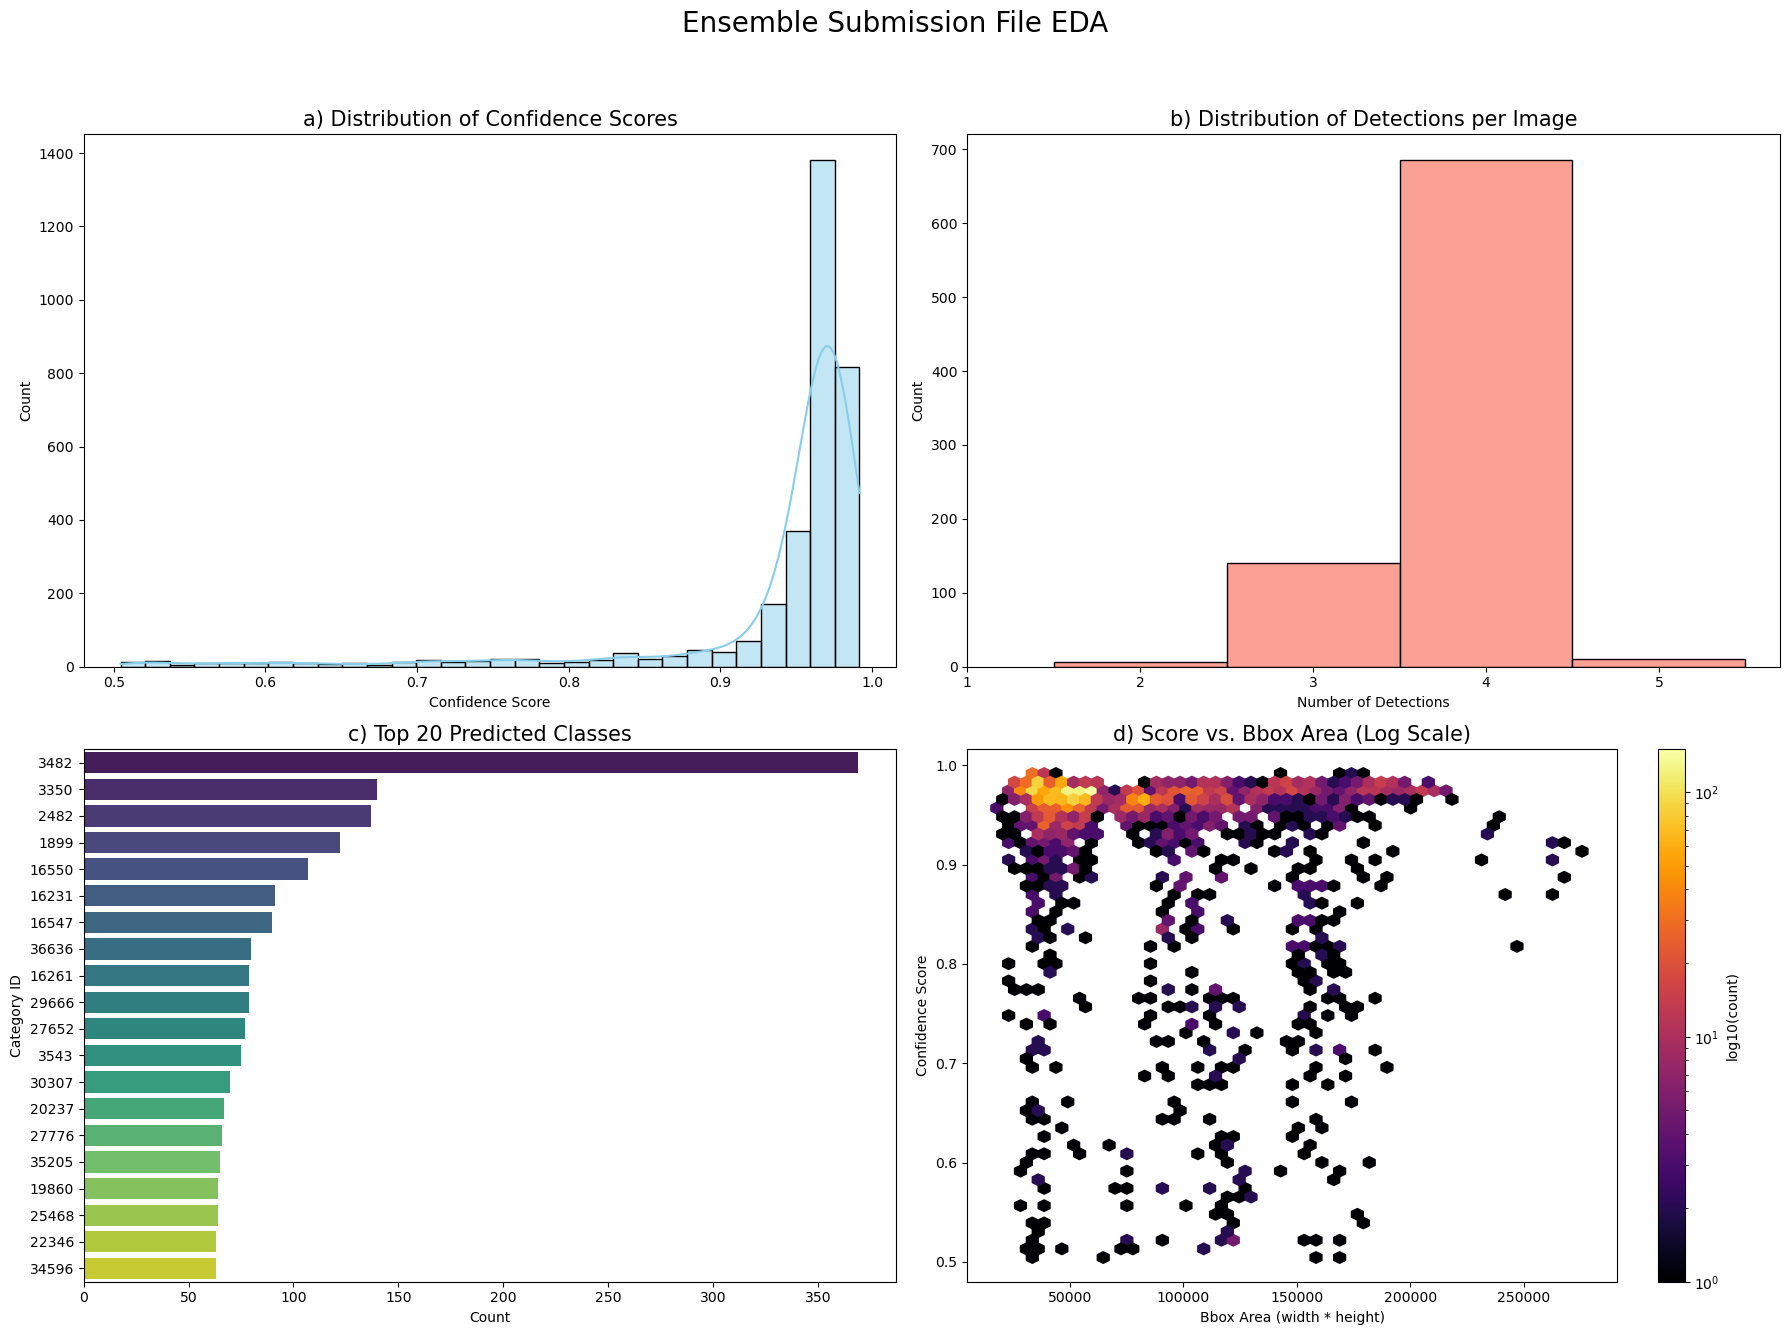

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. 설정: 분석할 submission 파일 경로 ---
SUBMISSION_FILE_PATH = "../output/submission_250730_mobilenet.csv"
SUBMISSION_FILE_PATH = "../output/submission_YOLO.csv"
SUBMISSION_FILE_PATH = "../output/submission_250729(2)_RESNET.csv"


# -------------------------------------------------------------------

# --- 2. 데이터 로드 ---
try:
    df = pd.read_csv(SUBMISSION_FILE_PATH)
    print(f"'{SUBMISSION_FILE_PATH}' 파일 로드 성공!")
    print(f"총 {len(df)}개의 예측(객체)을 발견했습니다.")
except FileNotFoundError:
    print(f"에러: 파일을 찾을 수 없습니다 - {SUBMISSION_FILE_PATH}")
    # exit() # 스크립트일 경우 종료

if not df.empty:
    # --- 3. 기본 통계 분석 ---
    print("\n### 1. 종합 통계 ###")
    print(f"- 예측이 포함된 이미지 수: {df['image_id'].nunique()}개")

    print("\n--- 신뢰도 점수(Score) 통계 ---")
    print(df["score"].describe())

    print("\n--- Bbox 크기(너비/높이) 통계 ---")
    df["bbox_area"] = df["bbox_w"] * df["bbox_h"]
    print(df[["bbox_w", "bbox_h", "bbox_area"]].describe())

    # --- 4. 시각적 분석 (EDA) ---
    print("\n### 2. 시각적 분석 ###")

    # 한글 폰트 설정 (필요시 주석 해제)
    # plt.rc('font', family='NanumGothic')
    # plt.rc('axes', unicode_minus=False)

    # 2x2 그리드 그래프 준비
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle("Ensemble Submission File EDA", fontsize=20)

    # a) 신뢰도 점수(Score) 분포
    sns.histplot(df["score"], kde=True, ax=axes[0, 0], bins=30, color="skyblue")
    axes[0, 0].set_title("a) Distribution of Confidence Scores", fontsize=15)
    axes[0, 0].set_xlabel("Confidence Score")

    # b) 이미지 당 예측 개수 분포
    detections_per_image = df.groupby("image_id").size()
    sns.histplot(detections_per_image, ax=axes[0, 1], discrete=True, color="salmon")
    axes[0, 1].set_title("b) Distribution of Detections per Image", fontsize=15)
    axes[0, 1].set_xlabel("Number of Detections")
    axes[0, 1].set_xticks(range(1, detections_per_image.max() + 1))

    # c) 예측된 클래스 분포 (상위 20개)
    top_classes = df["category_id"].value_counts().nlargest(20)
    sns.barplot(
        x=top_classes.values,
        y=top_classes.index.astype(str),
        ax=axes[1, 0],
        orient="h",
        palette="viridis",
    )
    axes[1, 0].set_title("c) Top 20 Predicted Classes", fontsize=15)
    axes[1, 0].set_xlabel("Count")
    axes[1, 0].set_ylabel("Category ID")

    # d) Bbox 면적에 따른 신뢰도 점수
    # 점이 너무 많으면 보기 어려우므로, 샘플링하거나 hexbin plot 사용
    sample_df = df.sample(n=min(len(df), 5000), random_state=42)  # 최대 5000개 샘플링
    hb = axes[1, 1].hexbin(
        x=sample_df["bbox_area"],
        y=sample_df["score"],
        gridsize=50,
        cmap="inferno",
        bins="log",
    )
    axes[1, 1].set_title("d) Score vs. Bbox Area (Log Scale)", fontsize=15)
    axes[1, 1].set_xlabel("Bbox Area (width * height)")
    axes[1, 1].set_ylabel("Confidence Score")
    fig.colorbar(hb, ax=axes[1, 1], label="log10(count)")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("DataFrame이 비어있어 분석을 진행할 수 없습니다.")

모든 submission 파일 통합 완료!


/tmp/ipykernel_523487/1177767100.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


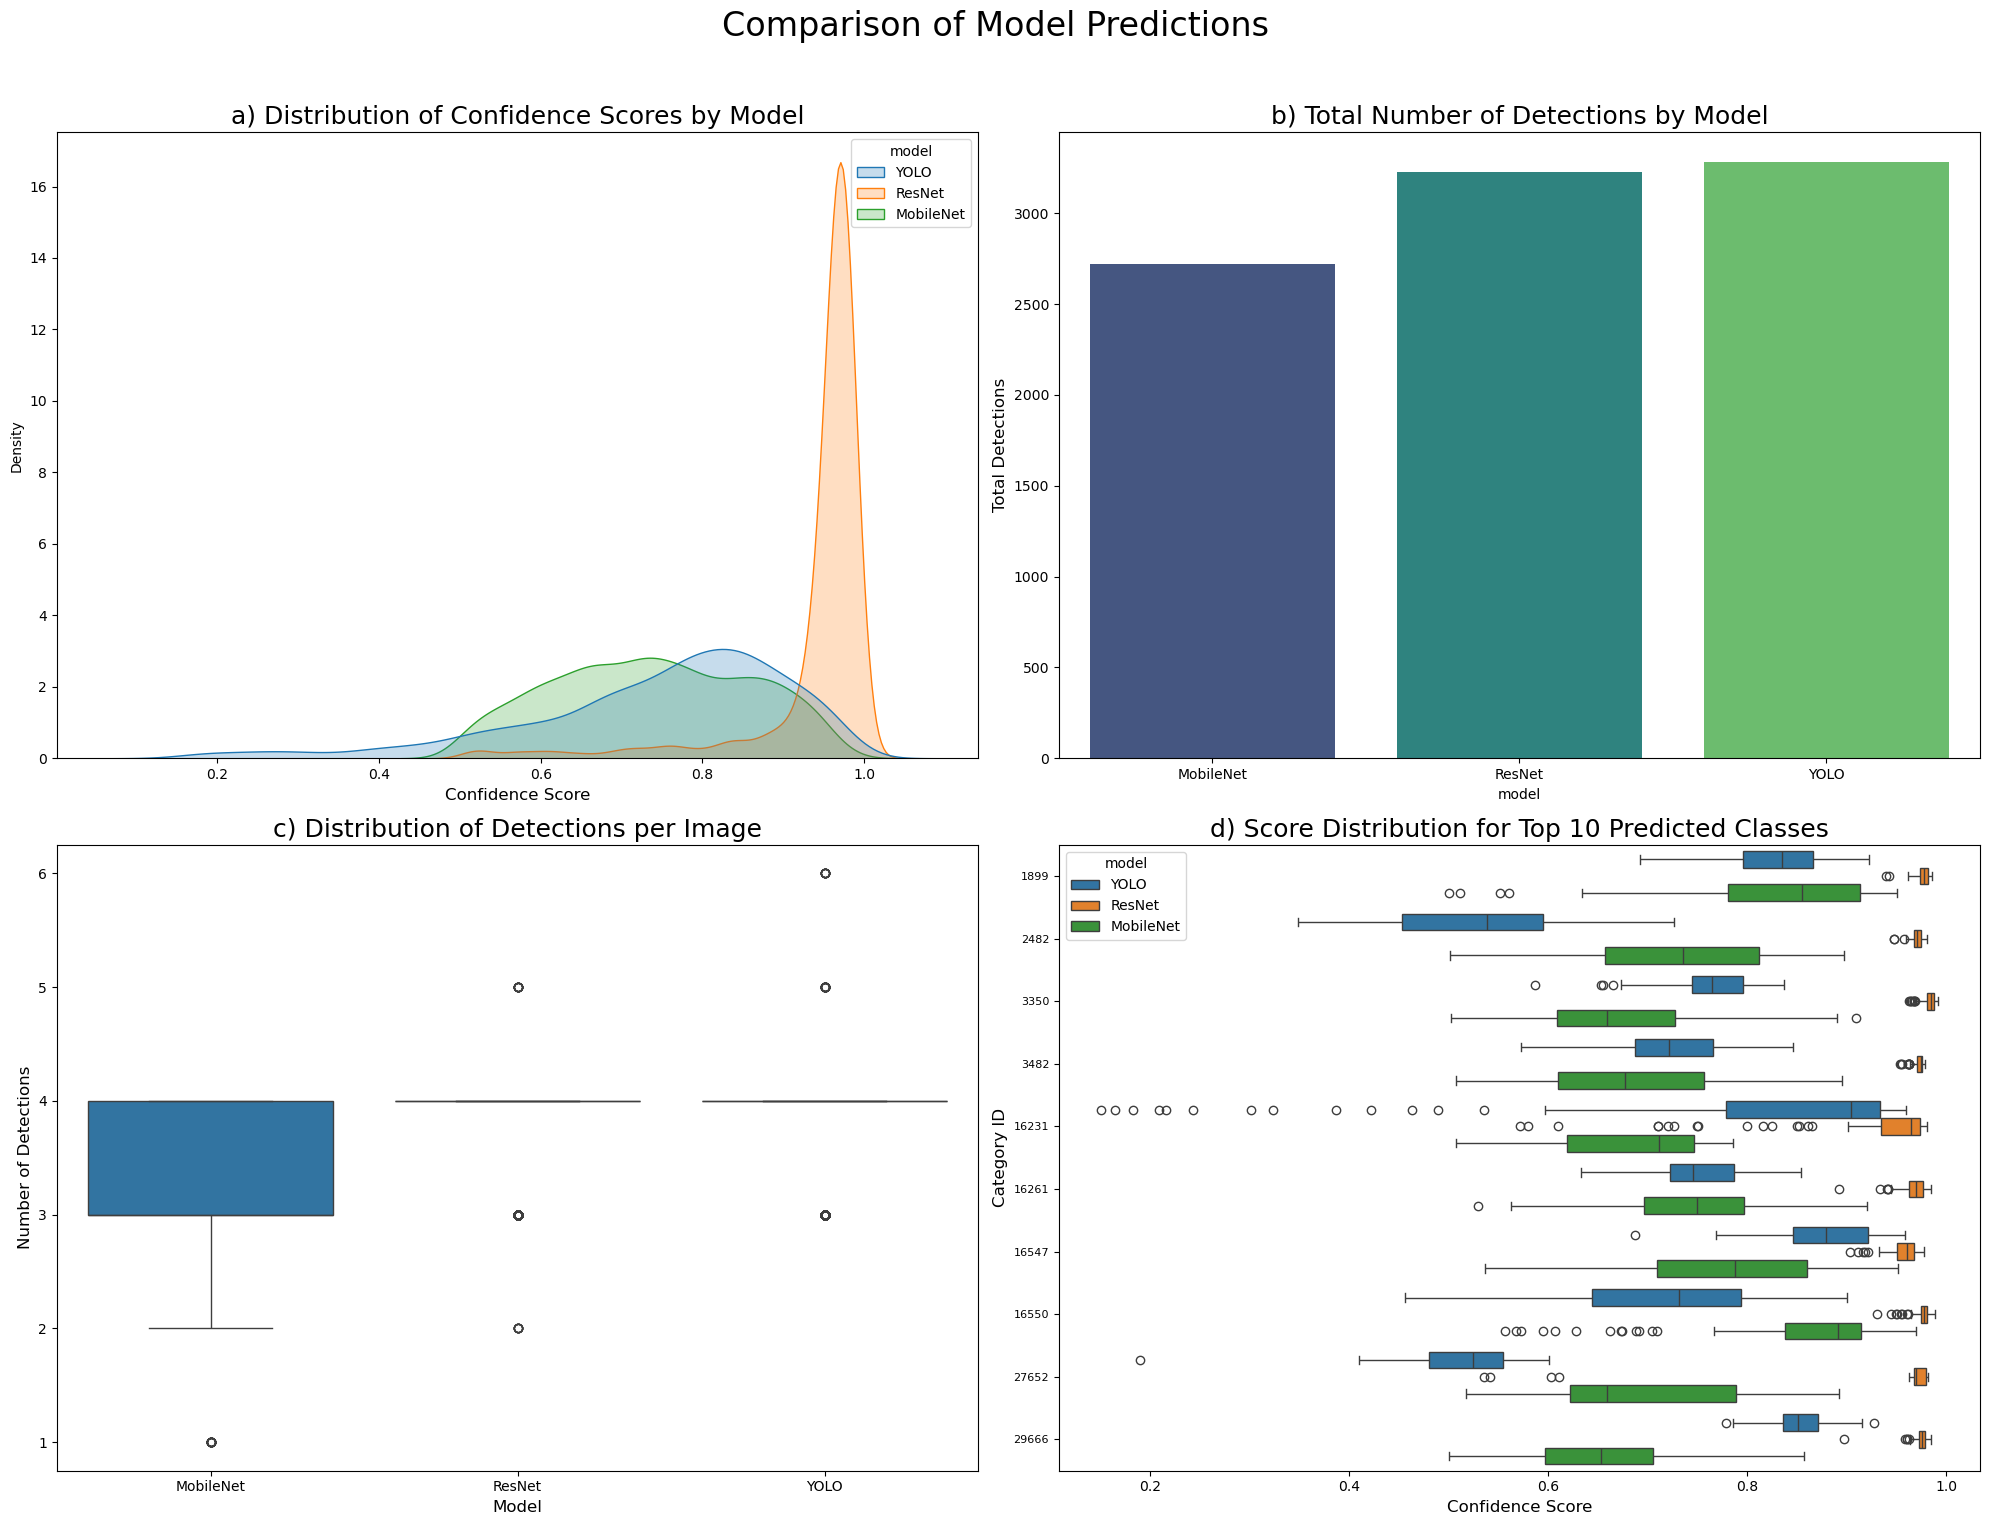

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. 설정: 분석할 파일 경로와 모델 이름 ---
# (파일 경로는 네 환경에 맞게 조절해 줘)
SUBMISSION_FILES = {
    "YOLO": "../output/submission_YOLO.csv",
    "ResNet": "../output/submission_250729(2)_RESNET.csv",
    "MobileNet": "../output/submission_250730_mobilenet.csv",
}

# -------------------------------------------------------------------

# --- 2. 데이터 로드 및 통합 ---
all_dfs = []
for model_name, file_path in SUBMISSION_FILES.items():
    try:
        df = pd.read_csv(file_path)
        df["model"] = model_name  # 어떤 모델의 예측인지 구별하기 위한 컬럼 추가
        all_dfs.append(df)
    except FileNotFoundError:
        print(f"Warning: 파일을 찾을 수 없습니다 - {file_path}")

if not all_dfs:
    print("분석할 파일이 없습니다.")
else:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    print("모든 submission 파일 통합 완료!")

    # --- 3. 시각적 비교 분석 ---
    # 2x2 그리드 그래프 준비
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle("Comparison of Model Predictions", fontsize=24)

    # a) 모델별 신뢰도 점수(Score) 분포
    sns.kdeplot(
        data=combined_df,
        x="score",
        hue="model",
        fill=True,
        ax=axes[0, 0],
        common_norm=False,
    )
    axes[0, 0].set_title("a) Distribution of Confidence Scores by Model", fontsize=18)
    axes[0, 0].set_xlabel("Confidence Score", fontsize=12)

    # b) 모델별 총 예측 개수
    total_detections = combined_df.groupby("model").size()
    sns.barplot(
        x=total_detections.index,
        y=total_detections.values,
        ax=axes[0, 1],
        palette="viridis",
    )
    axes[0, 1].set_title("b) Total Number of Detections by Model", fontsize=18)
    axes[0, 1].set_ylabel("Total Detections", fontsize=12)

    # c) 모델별 이미지 당 예측 개수 분포
    detections_per_image = (
        combined_df.groupby(["model", "image_id"]).size().reset_index(name="count")
    )
    sns.boxplot(data=detections_per_image, x="model", y="count", ax=axes[1, 0])
    axes[1, 0].set_title("c) Distribution of Detections per Image", fontsize=18)
    axes[1, 0].set_xlabel("Model", fontsize=12)
    axes[1, 0].set_ylabel("Number of Detections", fontsize=12)

    # d) 상위 10개 예측 클래스에 대한 모델별 신뢰도 점수
    top_10_classes = combined_df["category_id"].value_counts().nlargest(10).index
    top_10_df = combined_df[combined_df["category_id"].isin(top_10_classes)]
    sns.boxplot(
        data=top_10_df,
        x="score",
        y="category_id",
        hue="model",
        ax=axes[1, 1],
        orient="h",
    )
    axes[1, 1].set_title(
        "d) Score Distribution for Top 10 Predicted Classes", fontsize=18
    )
    axes[1, 1].set_xlabel("Confidence Score", fontsize=12)
    axes[1, 1].set_ylabel("Category ID", fontsize=12)
    axes[1, 1].tick_params(axis="y", labelsize=8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()

모든 submission 파일 통합 완료!


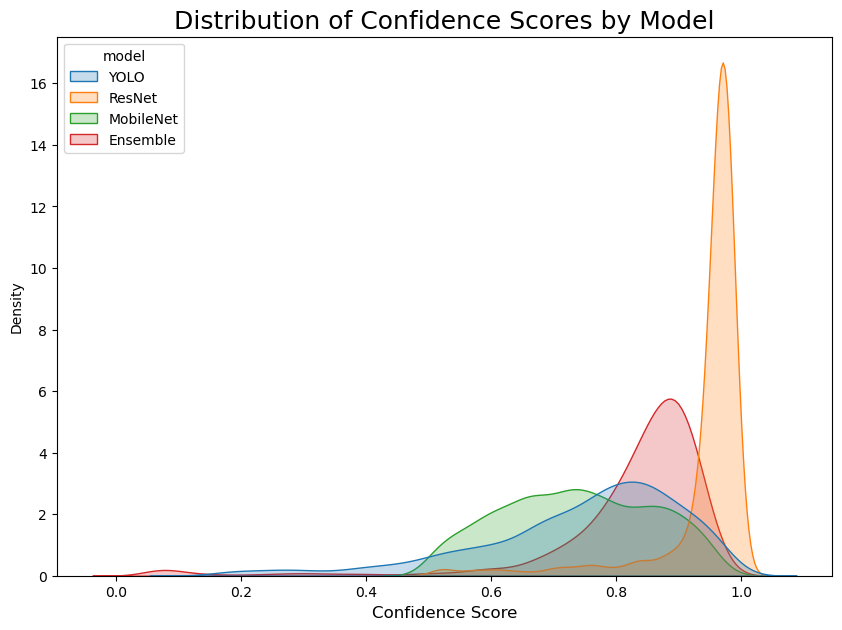

'output/figures/eda_comparison/a_score_distribution.png' 저장 완료


/tmp/ipykernel_709982/738575623.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


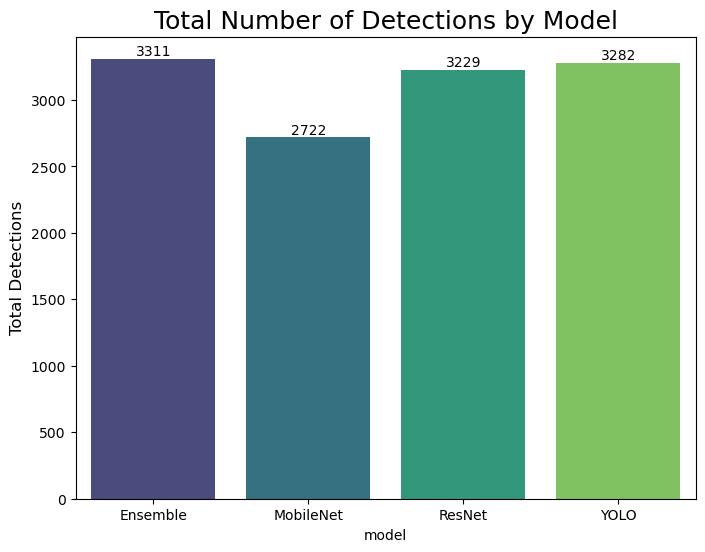

'output/figures/eda_comparison/b_total_detections.png' 저장 완료


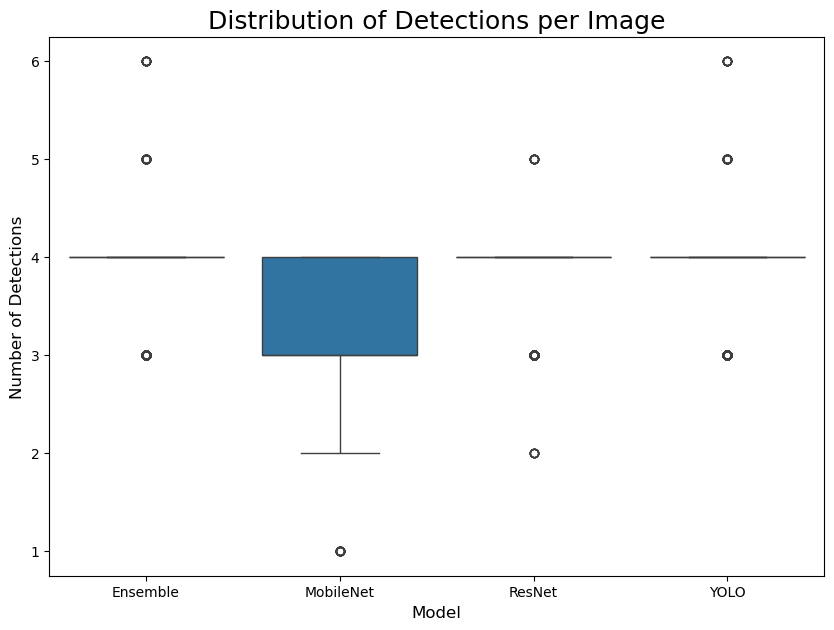

'output/figures/eda_comparison/c_detections_per_image.png' 저장 완료


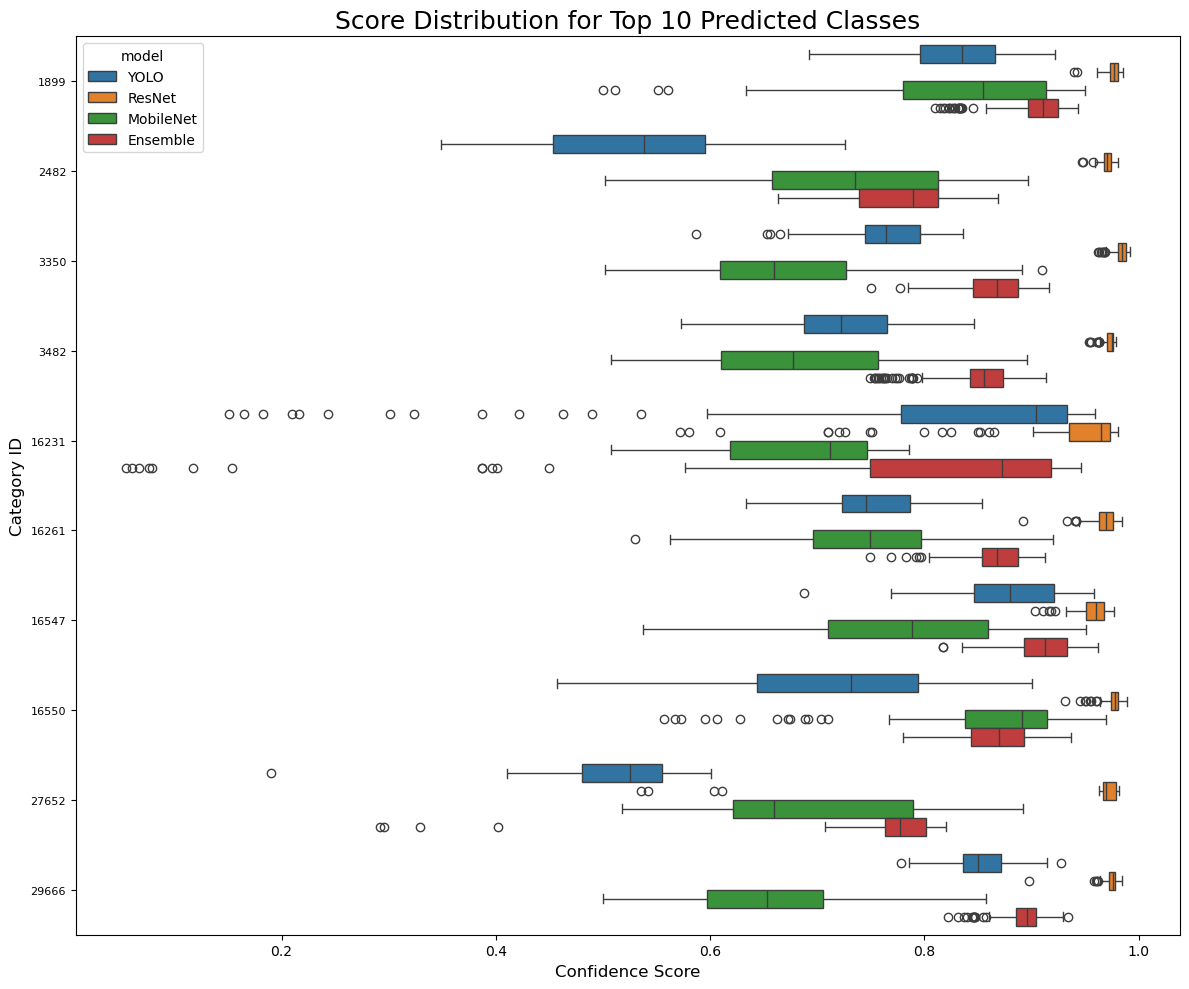

'output/figures/eda_comparison/d_score_by_top_classes.png' 저장 완료

모든 그래프가 성공적으로 저장되었습니다.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# --- 1. 설정: 분석할 파일 경로와 모델 이름 ---
SUBMISSION_FILES = {
    "YOLO": "../output/submission_YOLO.csv",
    "ResNet": "../output/submission_250729(2)_RESNET.csv",
    "MobileNet": "../output/submission_250730_mobilenet.csv",
    "Ensemble": "../output/submission_ensemble_250730(2).csv",
    # "ResNet05": "../output/submission_250730_RESNET_FINAL.csv",
}

# ⭐ 그래프를 저장할 폴더 경로 설정
FIGURES_DIR = Path("./output/figures/eda_comparison")
FIGURES_DIR.mkdir(parents=True, exist_ok=True)  # 폴더가 없으면 자동으로 생성

# -------------------------------------------------------------------

# --- 2. 데이터 로드 및 통합 ---
all_dfs = []
for model_name, file_path in SUBMISSION_FILES.items():
    try:
        df = pd.read_csv(file_path)
        df["model"] = model_name
        all_dfs.append(df)
    except FileNotFoundError:
        print(f"Warning: 파일을 찾을 수 없습니다 - {file_path}")

if not all_dfs:
    print("분석할 파일이 없습니다.")
else:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    print("모든 submission 파일 통합 완료!")

    # --- 3. 시각적 비교 분석 (그래프 개별 생성 및 저장) ---

    # a) 모델별 신뢰도 점수(Score) 분포
    plt.figure(figsize=(10, 7))
    sns.kdeplot(data=combined_df, x="score", hue="model", fill=True, common_norm=False)
    plt.title("Distribution of Confidence Scores by Model", fontsize=18)
    plt.xlabel("Confidence Score", fontsize=12)
    plt.savefig(FIGURES_DIR / "a_score_distribution.png")
    plt.show()
    plt.close()  # Figure 메모리 해제
    print(f"'{FIGURES_DIR / 'a_score_distribution.png'}' 저장 완료")

    # b) 모델별 총 예측 개수
    plt.figure(figsize=(8, 6))
    total_detections = combined_df.groupby("model").size()
    ax = sns.barplot(
        x=total_detections.index, y=total_detections.values, palette="viridis"
    )
    ax.bar_label(ax.containers[0])  # 막대 위에 숫자 표시
    ax.bar_label(ax.containers[1])  # 막대 위에 숫자 표시
    ax.bar_label(ax.containers[2])  # 막대 위에 숫자 표시
    ax.bar_label(ax.containers[3])  # 막대 위에 숫자 표시

    plt.title("Total Number of Detections by Model", fontsize=18)
    plt.ylabel("Total Detections", fontsize=12)
    plt.savefig(FIGURES_DIR / "b_total_detections.png")
    plt.show()
    plt.close()
    print(f"'{FIGURES_DIR / 'b_total_detections.png'}' 저장 완료")

    # c) 모델별 이미지 당 예측 개수 분포
    plt.figure(figsize=(10, 7))
    detections_per_image = (
        combined_df.groupby(["model", "image_id"]).size().reset_index(name="count")
    )
    sns.boxplot(data=detections_per_image, x="model", y="count")
    plt.title("Distribution of Detections per Image", fontsize=18)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Number of Detections", fontsize=12)
    plt.savefig(FIGURES_DIR / "c_detections_per_image.png")
    plt.show()
    plt.close()
    print(f"'{FIGURES_DIR / 'c_detections_per_image.png'}' 저장 완료")

    # d) 상위 10개 예측 클래스에 대한 모델별 신뢰도 점수
    plt.figure(figsize=(12, 10))
    top_10_classes = combined_df["category_id"].value_counts().nlargest(10).index
    top_10_df = combined_df[combined_df["category_id"].isin(top_10_classes)]
    sns.boxplot(data=top_10_df, x="score", y="category_id", hue="model", orient="h")
    plt.title("Score Distribution for Top 10 Predicted Classes", fontsize=18)
    plt.xlabel("Confidence Score", fontsize=12)
    plt.ylabel("Category ID", fontsize=12)
    plt.tick_params(axis="y", labelsize=8)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "d_score_by_top_classes.png")
    plt.show()
    plt.close()
    print(f"'{FIGURES_DIR / 'd_score_by_top_classes.png'}' 저장 완료")

    print("\n모든 그래프가 성공적으로 저장되었습니다.")

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm

# --- 1. 설정 ---
SUBMISSION_FILES = {
    "YOLO": "../output/submission_YOLO.csv",
    "ResNet": "../output/submission_250729(2)_RESNET.csv",
}

FIGURES_DIR = Path("../output/figures/advanced_eda")
FIGURES_DIR.mkdir(parents=True, exist_ok=True)


# ⭐ IoU 계산을 위한 헬퍼 함수 (버그 수정 버전)
def calculate_iou(box1, box2):
    """
    두 개의 바운딩 박스(x,y,w,h 형식)에 대한 IoU를 계산합니다.
    """
    # box format: [x, y, w, h]
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # [xmin, ymin, xmax, ymax] 형식으로 변환
    b1_xmin, b1_ymin, b1_xmax, b1_ymax = x1, y1, x1 + w1, y1 + h1
    b2_xmin, b2_ymin, b2_xmax, b2_ymax = x2, y2, x2 + w2, y2 + h2

    # 교집합(intersection) 좌표 계산
    inter_xmin = max(b1_xmin, b2_xmin)
    inter_ymin = max(b1_ymin, b2_ymin)
    inter_xmax = min(b1_xmax, b2_xmax)
    inter_ymax = min(b1_ymax, b2_ymax)  # <-- BUG FIX HERE

    # 교집합 면적 계산
    inter_area = max(0, inter_xmax - inter_xmin) * max(0, inter_ymax - inter_ymin)

    # 각 박스의 면적 계산
    b1_area = w1 * h1
    b2_area = w2 * h2

    # 합집합(union) 면적 계산
    union_area = b1_area + b2_area - inter_area

    # IoU 계산
    iou = inter_area / union_area if union_area > 0 else 0
    return iou


# --- 2. 데이터 로드 ---
dfs = {name: pd.read_csv(path) for name, path in SUBMISSION_FILES.items()}

# --- 3. 모델 예측 매칭 및 분석 ---
# (이하 분석 및 시각화 코드는 이전과 동일)
matched_predictions = []
yolo_unique_count = 0
resnet_unique_count = 0
image_ids = pd.concat(dfs.values())["image_id"].unique()

for image_id in tqdm(image_ids, desc="Comparing model predictions"):
    yolo_preds = dfs["YOLO"][dfs["YOLO"]["image_id"] == image_id]
    resnet_preds = dfs["ResNet"][dfs["ResNet"]["image_id"] == image_id]
    matched_resnet_indices = set()

    for _, yolo_row in yolo_preds.iterrows():
        best_iou = 0
        best_match = None
        yolo_box = yolo_row[["bbox_x", "bbox_y", "bbox_w", "bbox_h"]].values

        for resnet_idx, resnet_row in resnet_preds.iterrows():
            if yolo_row["category_id"] == resnet_row["category_id"]:
                resnet_box = resnet_row[["bbox_x", "bbox_y", "bbox_w", "bbox_h"]].values
                iou = calculate_iou(yolo_box, resnet_box)
                if iou > best_iou:
                    best_iou = iou
                    best_match = resnet_row
                    best_match_idx = resnet_idx

        if best_iou > 0.5:
            matched_predictions.append(
                {
                    "image_id": image_id,
                    "category_id": yolo_row["category_id"],
                    "iou_between_models": best_iou,
                    "score_yolo": yolo_row["score"],
                    "score_resnet": best_match["score"],
                }
            )
            matched_resnet_indices.add(best_match_idx)
        else:
            yolo_unique_count += 1

    resnet_unique_count += len(resnet_preds) - len(matched_resnet_indices)

matched_df = pd.DataFrame(matched_predictions)

# --- 4. 시각화 ---
print("\n--- Generating and Saving Plots ---")

# a) 예측 위치 일치도 (IoU) 분포
plt.figure(figsize=(10, 7))
sns.histplot(data=matched_df, x="iou_between_models", kde=True, bins=30)
plt.title("IoU Agreement between Matched Boxes", fontsize=16)
plt.xlabel("IoU between YOLO and ResNet boxes")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig(FIGURES_DIR / "advanced_eda_iou_agreement.png")
plt.close()
print(f"Saved: {FIGURES_DIR / 'advanced_eda_iou_agreement.png'}")

# b) 예측 신뢰도 상관관계
plt.figure(figsize=(8, 8))
sns.scatterplot(data=matched_df, x="score_yolo", y="score_resnet", alpha=0.5)
plt.title("Confidence Score Correlation", fontsize=16)
plt.xlabel("YOLO Confidence Score")
plt.ylabel("ResNet Confidence Score")
plt.plot([0, 1], [0, 1], ls="--", color="red", label="y=x line")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.axis("square")
plt.savefig(FIGURES_DIR / "advanced_eda_score_correlation.png")
plt.close()
print(f"Saved: {FIGURES_DIR / 'advanced_eda_score_correlation.png'}")

# c) 단독 탐지 개수 비교
plt.figure(figsize=(8, 7))
unique_detections = pd.DataFrame(
    {
        "model": ["YOLO Only", "ResNet Only"],
        "count": [yolo_unique_count, resnet_unique_count],
    }
)
ax = sns.barplot(data=unique_detections, x="model", y="count", palette="muted")
ax.bar_label(ax.containers[0])  # 막대 위에 숫자 표시
ax.bar_label(ax.containers[1])  # 막대 위에 숫자 표시

plt.title("Number of Unique Detections", fontsize=16)
plt.ylabel("Count")
plt.xlabel("Model")
plt.savefig(FIGURES_DIR / "advanced_eda_unique_detections.png")
plt.close()
print(f"Saved: {FIGURES_DIR / 'advanced_eda_unique_detections.png'}")

print("\n--- Analysis Summary ---")
print(f"Total matched predictions (IoU > 0.5): {len(matched_df)}")
print(f"Detections unique to YOLO: {yolo_unique_count}")
print(f"Detections unique to ResNet: {resnet_unique_count}")

Comparing model predictions:   0%|          | 0/843 [00:00<?, ?it/s]

Comparing model predictions: 100%|██████████| 843/843 [00:02<00:00, 353.45it/s]



--- Generating and Saving Plots ---
Saved: ../output/figures/advanced_eda/advanced_eda_iou_agreement.png
Saved: ../output/figures/advanced_eda/advanced_eda_score_correlation.png
Saved: ../output/figures/advanced_eda/advanced_eda_unique_detections.png

--- Analysis Summary ---
Total matched predictions (IoU > 0.5): 3201
Detections unique to YOLO: 81
Detections unique to ResNet: 28


/tmp/ipykernel_709982/267522323.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=unique_detections, x="model", y="count", palette="muted")
